# 과제: MNIST 데이터를 나만의 NN model로 95 % 이상의 성능으로 training 시켜보자!


## Loading MNIST training data

In [122]:
import tensorflow as tf
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scaling(image data는 min-max scaling 주로 사용)
x_train = x_train/255.0
x_test = x_test/255.0

## Training Data
28 * 28 pixel 값을 가진 총 60000개의 이미지 데이터

In [123]:
x_train.shape 

(60000, 28, 28)

Neural network 모델에 맞게 이미지 데이터를 벡터 형태로 데이터를 reshape 합니다.  
(Model을 만들 때 *keras.layers.Flatten(input_shape=(28, 28)) 이용해도 됨)

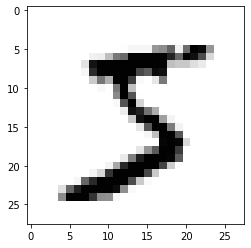

In [124]:
plt.imshow(x_train[0].reshape(28,28)).set_cmap('Greys')

## Training Labels
이미지 데이터가 나타내는 숫자값을 label로 가지고 있고, 0부터 9까지의 값을 나타냄  
마찬가지로, 60000개의 label이 존재

In [125]:
x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [126]:
    from tensorflow.keras.datasets import fashion_mnist
    from tensorflow.keras.models import Sequential 
    from tensorflow.keras.layers import Dense, Dropout
    from tensorflow.keras import utils
    from tensorflow.keras.preprocessing import image
    import numpy as np
    import tensorflow as tf
    import matplotlib.pyplot as plt

In [127]:

y_train = utils.to_categorical(y_train,10)  
y_test = utils.to_categorical(y_test,10)

In [128]:
y_train.shape

(60000, 10)

In [129]:
# show MNIST label for above data
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## 나만의 모델을 tensorflow keras API 를 이용해 만들어 봅시다~

* parameters for model

In [130]:
activation_list = ["sigmoid", "relu", "softmax", "tanh"]

loss_list = ["sparse_categorical_crossentropy",
             "categorical_crossentropy", 
             "binary_crossentropy"]

optimizer_list = ["sgd", "adam", "rmsprop", "adagrad"]

initializer_list = [tf.keras.initializers.RandomNormal(), 
                    tf.keras.initializers.RandomUniform(), 
                    tf.keras.initializers.he_normal(), 
                    tf.keras.initializers.he_uniform(), 
                    tf.keras.initializers.GlorotUniform(),
                    tf.keras.initializers.GlorotNormal()]

# dropout
dropout_rate = 0.3
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation = "sigmoid"),
    tf.keras.layers.Dense(2, activation = "sigmoid"),
    tf.keras.layers.Dropout(dropout_rate)
])


# regularizer
regularizer = tf.keras.regularizers.l1(1e-3)
regularizer = tf.keras.regularizers.l2(1e-3)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          activity_regularizer=regularizer)
])

# weight initialization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          kernel_initializer=initializer_list[0])
])

#### My Own Model 

In [131]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 800, input_dim = 784, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

내가 만든 모델을 확인해 봅시다.

In [132]:
model.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_59 (Dense)             (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________


model을 자유롭게 train 해봅시다.  

In [133]:
model.fit(x_train, y_train, batch_size=200, epochs=10,  verbose=2)

Epoch 1/10
300/300 - 3s - loss: 0.2744 - accuracy: 0.9223
Epoch 2/10
300/300 - 3s - loss: 0.1097 - accuracy: 0.9681
Epoch 3/10
300/300 - 3s - loss: 0.0701 - accuracy: 0.9794
Epoch 4/10
300/300 - 3s - loss: 0.0501 - accuracy: 0.9857
Epoch 5/10
300/300 - 3s - loss: 0.0375 - accuracy: 0.9892
Epoch 6/10
300/300 - 3s - loss: 0.0264 - accuracy: 0.9930
Epoch 7/10
300/300 - 3s - loss: 0.0197 - accuracy: 0.9948
Epoch 8/10
300/300 - 3s - loss: 0.0154 - accuracy: 0.9963
Epoch 9/10
300/300 - 3s - loss: 0.0109 - accuracy: 0.9976
Epoch 10/10
300/300 - 3s - loss: 0.0078 - accuracy: 0.9987


95%이상의 성능을 가진 모델을 만들면 완성!

In [134]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

print('\nAccuracy:', test_acc)

313/313 - 1s - loss: 0.0596 - accuracy: 0.9805

Accuracy: 0.9804999828338623


![](https://www.tensorflow.org/versions/master/images/mnist_tensorboard.png)